This file contains the interpretability workings of LIME

In [2]:
import lime
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

In [3]:
df = pd.read_csv("../IMDB_with_predictions.csv")[0:1000:1]
model = keras.models.load_model("../CNN_Non_Dense")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.review)
tokenized_texts = tokenizer.texts_to_sequences(df.review)
padded_texts = pad_sequences(tokenized_texts, padding="post", maxlen=1000)

Explanations

In [4]:
def prediction_fn(data):
    pred = model.predict(data).round(2)
    if(pred[0] == 1):
        return np.array(((0,1.0), (0,0)))
    return np.array(((1.0, 0), (0,0)))

from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(class_names=[0,1], training_data=padded_texts)
explanations = explainer.explain_instance(padded_texts[0], prediction_fn, num_samples=2)
# print(prediction_fn(padded_texts[0:1:1]))

1/1 [==============================] - 0s 67ms/step
[1. 0.]:	1


2023-10-17 13:15:10.047247: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/opt/homebrew/anaconda3/envs/graphsageoncora/lib/python3.8/site-packages/lime/lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""


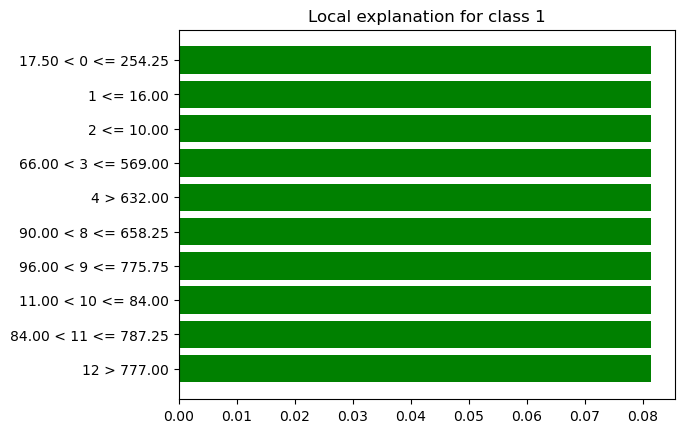

In [5]:
fig = explanations.as_pyplot_figure()